<a href="https://colab.research.google.com/github/ejs94/ocr-examples/blob/main/OCR_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR com Python e Tesseract

# Reconhecimento de texto em imagens

## Instalando o Tesseract

Documentação: https://pypi.org/project/pytesseract/

## Importando as bibliotecas

In [275]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from IPython import display

In [276]:
# Use this if tesseract is not in PATH
# Path to acess tesseract x64 API in Windows
#pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [277]:
%matplotlib inline
import matplotlib.pyplot as plt

## Leitura da imagem

(-0.5, 699.5, 399.5, -0.5)

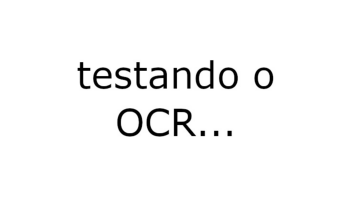

In [278]:
img = cv2.imread('./content/Imagens/teste01.jpg') # Format BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
plt.imshow(rgb)
plt.axis('off')

In [279]:
texto = pytesseract.image_to_string(rgb)

In [280]:
print(texto)

testando o
OCR...



## Suporte para caracteres e símbolos de outros idiomas

(-0.5, 699.5, 399.5, -0.5)

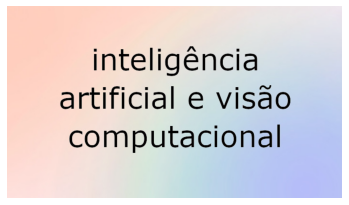

In [281]:
gbr = cv2.imread('./content/Imagens/teste02.jpg')
plt.imshow(gbr)
plt.axis('off')

(-0.5, 699.5, 399.5, -0.5)

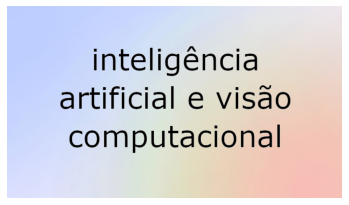

In [282]:
img = cv2.imread('./content/Imagens/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

In [283]:
texto = pytesseract.image_to_string(rgb)
print(texto) # resumé, fiancé, déjà vu

inteligéncia
artificial e visao
computacional



In [284]:
#Check for installed language
#!tesseract --list-langs

In [285]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [286]:
# Download trained languages from official github
#!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

In [287]:
config_tesseract = '--tessdata-dir content/tessdata' # Using a local file with trained language
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



In [288]:
# To download english trained model to local tessdata
#!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
#!ls tessdata/

## Parâmetros

### Page segmentation modes (PSM)

In [289]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


(-0.5, 499.5, 154.5, -0.5)

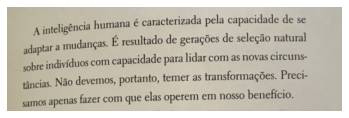

In [290]:
img = cv2.imread('./content/Imagens/trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

In [291]:
config_tesseract = '--psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
dobre indivíduos com capacidade para lidar com as novas circuns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
amos apenas fazer com que elas operem em nosso benefício.



In [292]:
#config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
dobre indivíduos com capacidade para lidar com as novas circuns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
amos apenas fazer com que elas operem em nosso benefício.



In [293]:
config_tesseract = '--tessdata-dir ./content/tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ª%âªªââ%%%ã%â%âêâãgêªâª%%



(-0.5, 218.5, 137.5, -0.5)

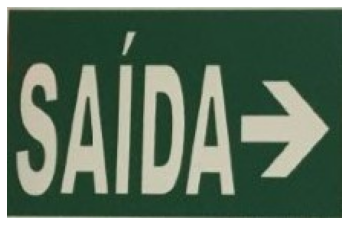

In [294]:
img = cv2.imread('./content/Imagens/saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

In [295]:
config_tesseract = '--tessdata-dir ./content/tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



### Detecção de orientação da página

Para podermos aproveitar as informações de OSD, é necessário fazer a leitura da imagem através da lib Pillow, essa lib realiza leitura por rgb não sendo necessário a conversão de bgr para rgb.

In [296]:
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt

(-0.5, 499.5, 464.5, -0.5)

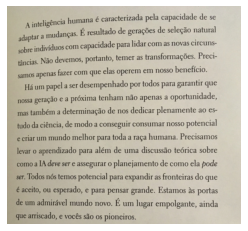

In [297]:
img = Image.open('./content/Imagens/livro01.jpg')
plt.imshow(img);
plt.axis('off')

O script detectado será Latin, já que a lingua portuguesa é derivada dela. Se o script estivese em Japonês ele seria identificado abaixo.

In [298]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



# Seleção dos textos



In [299]:
from pytesseract import Output

(-0.5, 699.5, 399.5, -0.5)

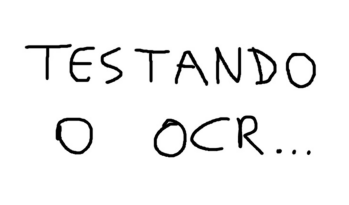

In [300]:
img = cv2.imread('./content/Imagens/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [301]:
config_tesseract = '--tessdata-dir ./content/tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': [-1, -1, -1, -1, 90, -1, 77, 61],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

In [302]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [303]:
def caixa_texto(resultado, rgb, min_conf, cor = (255, 100, 0), tamanho_texto=32):
  img_copia = rgb.copy()
  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
      x = resultado['left'][i]
      y = resultado['top'][i]
      w = resultado['width'][i]
      h = resultado['height'][i]
      cv2.rectangle(img_copia, (x, y), (x + w, y + h), cor, 2)
  return img_copia

In [304]:
len(resultado['text'])

8

(-0.5, 699.5, 399.5, -0.5)

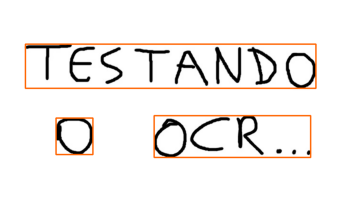

In [305]:
img2 = caixa_texto(resultado, rgb, min_conf)
plt.imshow(img2)
plt.axis('off')

In [306]:
img = cv2.imread('./content/Imagens/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [307]:
config_tesseract = "--tessdata-dir ./content/tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [308]:
def escreve_texto(texto, x, y, img, tamanho_texto=32):
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = ImageFont.truetype('./content/Fontes/calibri.ttf', 32))
  img = np.array(img_pil)
  return img

In [309]:
def caixa_texto2(resultado, rgb, min_conf, cor = (255, 100, 0), tamanho_texto=32, fonte = '.\content\Fontes\calibri.ttf' ):
  # Draw boxes
  img_copia = rgb.copy()
  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
      x = resultado['left'][i]
      y = resultado['top'][i]
      w = resultado['width'][i]
      h = resultado['height'][i]
      cv2.rectangle(img_copia, (x, y), (x + w, y + h), cor, 2)
  
  # Draw text
  img_pil = Image.fromarray(img_copia)
  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
      x = resultado['left'][i]
      y = resultado['top'][i]
      w = resultado['width'][i]
      h = resultado['height'][i]
      texto = resultado['text'][i]
      draw = ImageDraw.Draw(img_pil)
      draw.text((x, y - tamanho_texto), texto, font = ImageFont.truetype('./content/Fontes/calibri.ttf', 32), fill="#ff0000")
  
  new_img = np.array(img_pil)
  return new_img

(-0.5, 699.5, 399.5, -0.5)

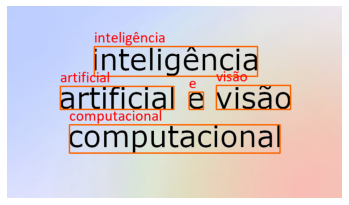

In [310]:
img_copia = rgb.copy()
img3 = caixa_texto2(resultado, img_copia, min_conf)
plt.imshow(img3)
plt.axis('off')

# Buscando informações específicas na imagem 

In [311]:
import re # regular expressions

(-0.5, 1041.5, 133.5, -0.5)

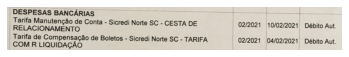

In [312]:
img = cv2.imread("./content/Imagens/tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

In [313]:
config_tesseract = "--tessdata-dir ./content/tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado['text']

['',
 '',
 '',
 '',
 'DESPESAS',
 'BANCÁRIAS',
 '',
 '',
 '',
 'Tarifa',
 'Manutenção',
 'de',
 'Conta',
 '-',
 'Sicredi',
 'Norte',
 'SC',
 '-',
 'CESTA',
 'DE',
 '02/2021',
 '10/02/2021',
 'Débito',
 'Aut.',
 '',
 'RELACIONAMENTO',
 '',
 'Tarifa',
 'de',
 'Compensação',
 'de',
 'Boletos',
 '-',
 'Sicredi',
 'Norte',
 'SC',
 '-',
 'TARIFA',
 '02/2021',
 '04/02/2021',
 'Débito',
 'Aut.',
 '',
 '',
 '',
 'COM',
 'R',
 'LIQUIDAÇÃO']

In [314]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

In [315]:
datas = []
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      datas.append(texto)


In [316]:
datas

['10/02/2021', '04/02/2021']

# Detecção de texto em cenários naturais

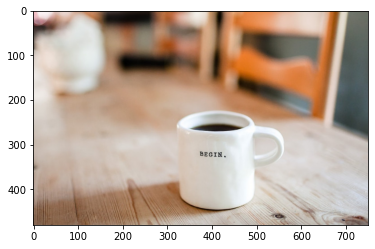

In [317]:
img = cv2.imread("content\Imagens\caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [318]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0, 668, 668, 668, 668, 374, 374, 374, 374, 0, 0, 0, 0],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 409, 409, 409, 409],
 'width': [750, 82, 82, 82, 82, 58, 58, 58, 58, 169, 169, 169, 169],
 'height': [480, 295, 295, 295, 295, 13, 13, 13, 13, 71, 71, 71, 71],
 'conf': [-1, -1, -1, -1, 95, -1, -1, -1, 93, -1, -1, -1, 95],
 'text': ['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']}

(-0.5, 749.5, 479.5, -0.5)

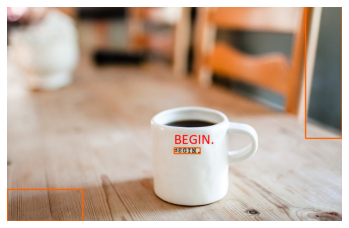

In [319]:
img_copia = rgb.copy()
img4 = caixa_texto2(resultado, img_copia, min_conf)
plt.imshow(img4)
plt.axis('off')

In [321]:
def caixa_texto3(resultado, rgb, min_conf, cor = (255, 100, 0), tamanho_texto=32, fonte = '.\content\Fontes\calibri.ttf' ):
    # Draw boxes
    img_copia = rgb.copy()
    for i in range(0, len(resultado['text'])):
        confianca = int(resultado['conf'][i])
        if confianca > min_conf:
            texto = resultado['text'][i]
            if not texto.isspace() and len(texto) > 0:
                x = resultado['left'][i]
                y = resultado['top'][i]
                w = resultado['width'][i]
                h = resultado['height'][i]
                cv2.rectangle(img_copia, (x, y), (x + w, y + h), cor, 2)
  
    # Draw text
    img_pil = Image.fromarray(img_copia)
    for i in range(0, len(resultado['text'])):
        confianca = int(resultado['conf'][i])
        if confianca > min_conf:
            texto = resultado['text'][i]
            if not texto.isspace() and len(texto) > 0:
                x = resultado['left'][i]
                y = resultado['top'][i]
                w = resultado['width'][i]
                h = resultado['height'][i]
                draw = ImageDraw.Draw(img_pil)
                draw.text((x, y - tamanho_texto), texto, font = ImageFont.truetype('./content/Fontes/calibri.ttf', 32), fill="#ff0000")

    new_img = np.array(img_pil)
    return new_img

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

In [271]:
resultado['conf']

[-1, -1, -1, -1, 95, -1, -1, -1, 93, -1, -1, -1, 95]

In [272]:
resultado['text']

['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']